In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# **전세사기 요인 - 대출(LTV)**
LTV, CLTV: 주택금융시장의 건전성 지표


LTV = 주택담보대출 / 임대주택가격

CLTV = (주택담보대출 + **임대보증금**) / 임대주택가격

# **과도한 전세자금대출이 초래한 전세사기**

-일부 임대인들이 **갭투자**를 통해 주택과 건물 매매를 무리하게 확장한 점이 전세사기의 주된 원인

-갭투자: 시세차익을 목적으로 전세 임차인을 구하는 동시에 매매를 진행하는 투자방식으로, **매매 당시에는 매매가에서 전세가를 뺀 금액만으로 주택을 구매할 수 있음**

-일부 임대인들은 매입한 주택에 전세를 들여 보증금을 받고 해당 주택을 담보로 대출받은 후, 보증금과 대출금으로 또 다른 주택을 구입했다. 임대인들은 이를 악용해 보증금 상환 능력이 없음에도 소유 주택을 늘려갔다. 그러나 작년부터 시작된 금리 인상 기조와 이에 따른 집값 하락에 **임대인들은 대출 이자를 감당하지 못해 매물을 내놓거나 보유하고 있던 주택을 압류**당했다. 이 같은 **임대인의 파산으로 임차인들은 보증금을 돌려받지 못하는 전세사기를 당하게 된 것**이다.

http://www.skkuw.com/news/articleView.html?idxno=30117

# **LTV지표를 통해 알아보는 대출비율과 연체율의 상관관계**

LTV 70미만의 연체율:1.6 / LTV 70 이상의 연체율: 3.6

전세자금대출 한도의 확대 -> 연체율 상승 및 전세사기 증가와의 연관성?
전세자금대출 및 보증보험 확대

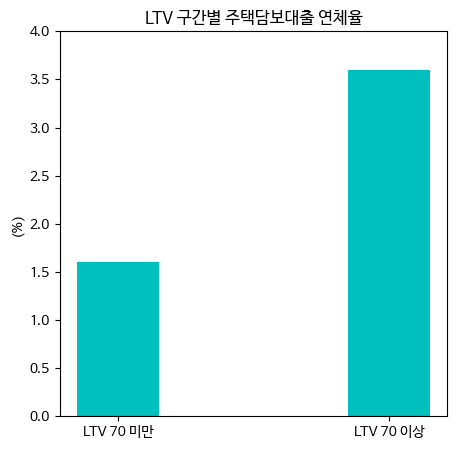

In [5]:
ud70 = 1.6
up70 = 3.6

plt.figure(figsize=(5,5))
plt.title('LTV 구간별 주택담보대출 연체율')
plt.bar('LTV 70 미만', ud70, color='c', width=0.3)
plt.bar('LTV 70 이상', up70, color='c', width=0.3)

plt.ylabel('(%)')
plt.ylim(0, 4)
plt.show()

# **전세보증금 반환보증보험 발급 현황**

In [44]:
filename = '/content/drive/MyDrive/아웃라이어 과제/전세보증금반환보증 발급현황_20230809.csv'
insurance = pd.read_csv(filename, encoding='utf-8')

insurance.head()

,연도,월,주택,건수,금액(백만원),비율(건수기준_퍼센트)
0,2016,3,다세대주택,78,10905,2
1,2016,3,오피스텔,23,4032,1
2,2016,3,아파트,3893,857485,95
3,2017,3,다세대주택,556,93879,7
4,2017,3,오피스텔,162,29318,2


In [46]:
vl = insurance.loc[insurance['주택'] == '다세대주택']
ofc = insurance.loc[insurance['주택'] == '오피스텔']
apt = insurance.loc[insurance['주택'] == '아파트']

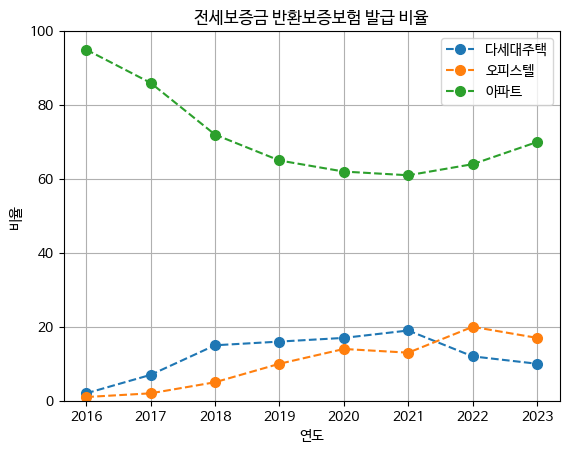

In [48]:
plt.title('전세보증금 반환보증보험 발급 비율')
plt.plot(vl['연도'], vl['비율(건수기준_퍼센트)'], label='다세대주택', linestyle='--', marker='o', markersize='7')
plt.plot(ofc['연도'], ofc['비율(건수기준_퍼센트)'], label='오피스텔', linestyle='--', marker='o', markersize='7')
plt.plot(apt['연도'], apt['비율(건수기준_퍼센트)'], label='아파트', linestyle='--', marker='o', markersize='7')

plt.legend()
plt.xlabel('연도')
plt.ylabel('비율')
plt.ylim(0, 100)
plt.grid()
plt.show()

# **주택 유형별 보증보험 발급 비율 비교 (2016년과 2023년)**

In [ ]:
is_2016 = insurance.loc[insurance['연도'] == 2016]
is_2023 = insurance.loc[insurance['연도'] == 2023]

In [11]:
is_2016

,연도,월,주택,건수,금액(백만원),비율(건수기준_퍼센트)
0,2016,3,다세대주택,78,10905,2
1,2016,3,오피스텔,23,4032,1
2,2016,3,아파트,3893,857485,95


In [13]:
is_2023

,연도,월,주택,건수,금액(백만원),비율(건수기준_퍼센트)
21,2023,3,아파트,23295,6509267,70
22,2023,3,오피스텔,5704,1036623,17
23,2023,3,다세대주택,3201,656395,10


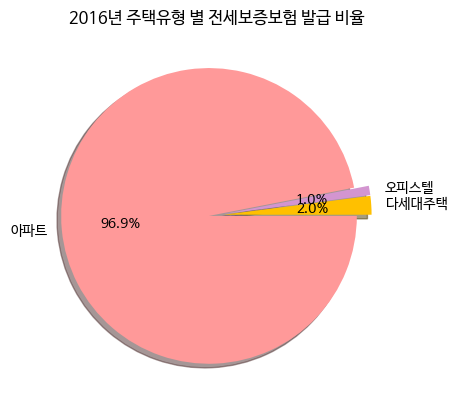

In [43]:
my_colors = ['#ffc000', '#d395d0', '#ff9999']
explode = [0.05, 0.05, 0.05]

plt.title('2016년 주택유형 별 전세보증보험 발급 비율')
plt.pie(is_2016['비율(건수기준_퍼센트)'], labels = is_2016['주택'], autopct='%1.1f%%', colors = my_colors, explode=explode, shadow=True)
plt.show()

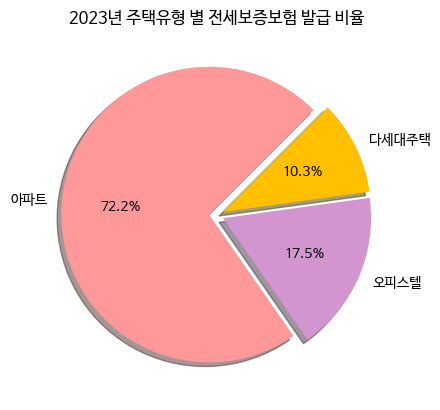

In [42]:
my_colors = ['#ff9999', '#d395d0', '#ffc000']

plt.title('2023년 주택유형 별 전세보증보험 발급 비율')
plt.pie(is_2023['비율(건수기준_퍼센트)'], labels = is_2023['주택'], startangle=45, autopct='%1.1f%%', colors = my_colors, explode=explode, shadow=True)
plt.show()

In [ ]:
filename2 = '/content/drive/MyDrive/아웃라이어 과제/보증사고 현황(2016-2022)_주택도시보증공사.csv'
incidient = pd.read_csv(filename2, encoding='cp949')

incidient.head(10)

,연도,보증종류,건수,금액(억원)
0,2016,주택분양보증,2,517.0
1,2016,주택임대보증,0,0.0
2,2016,주상복합분양보증,0,0.0
3,2016,조합주택시공보증,3,502.0
4,2016,하자보수보증,11,13.0
5,2016,인허가보증,0,0.0
6,2016,감리비예치보증,0,0.0
7,2016,임대보증금보증,0,0.0
8,2016,PF보증,0,0.0
9,2016,하도급보증,0,0.0


In [ ]:
inc = incidient.loc[incidient['보증종류'] == '전세대출특약보증']
inc

,연도,보증종류,건수,금액(억원)
18,2016,전세대출특약보증,31,32.0
39,2017,전세대출특약보증,53,77.0
60,2018,전세대출특약보증,203,286.0
82,2019,전세대출특약보증,509,752.0
105,2020,전세대출특약보증,886,1257.0
128,2021,전세대출특약보증,939,1214.0
151,2022,전세대출특약보증,1109,1485.0


# **전세보증금 대출 사고 현황**

(세입자가 은행에서 빌린 전세대출을 갚지 못해 HUG가 대신 갚아준 건수, 금액)

In [ ]:
inc = inc.drop('보증종류', axis=1)
inc

,연도,건수,금액(억원)
18,2016,31,32.0
39,2017,53,77.0
60,2018,203,286.0
82,2019,509,752.0
105,2020,886,1257.0
128,2021,939,1214.0
151,2022,1109,1485.0


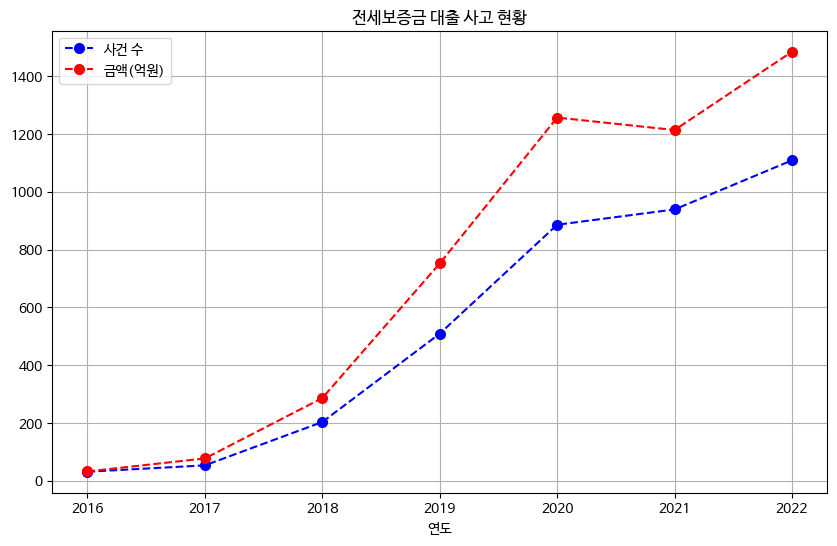

In [ ]:
plt.figure(figsize=(10,6))
plt.title('전세보증금 대출 사고 현황')
plt.plot(inc['연도'], inc['건수'], color='b', label='사건 수', linestyle='--', marker='o', markersize='7')
plt.plot(inc['연도'], inc['금액(억원)'], color='r', label='금액(억원)', linestyle='--', marker='o', markersize='7')

plt.legend()
plt.xlabel('연도')
plt.grid()
plt.show()